# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
sns.set_theme(style='darkgrid',palette='rainbow')

# Load Dataset

In [2]:
Toyato_corolla= pd.read_csv('ToyotaCorolla - MLR.csv')
Toyato_corolla

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# EDA

In [3]:
Toyato_corolla.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [4]:
Toyato_corolla.shape

(1436, 11)

In [5]:
Toyato_corolla.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
Toyato_corolla.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
Toyato_corolla.duplicated().sum()

1

In [8]:
# In this we will drop all the duplicates present in dataset
Toyato_corolla.drop_duplicates(inplace=True)

In [9]:
Toyato_corolla['Automatic'].unique()

array([0, 1], dtype=int64)

In [10]:
Toyato_corolla['Cylinders'].unique()

array([4], dtype=int64)

In [11]:
Toyato_corolla['Gears'].unique()

array([5, 6, 3, 4], dtype=int64)

In [12]:
# We Drop The Columns that we do not need
Toyato_corolla.drop(columns=['Cylinders'],inplace=True)

In [13]:
# we convert the columns in to dummie value for model building
pd.get_dummies(Toyato_corolla,columns=['Fuel_Type'],dtype=int)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [14]:
# For unique Value
Toyato_corolla['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [15]:
Toyato_corolla=pd.get_dummies(Toyato_corolla,columns=['Fuel_Type'],dtype=int)
Toyato_corolla

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


# Visualisation

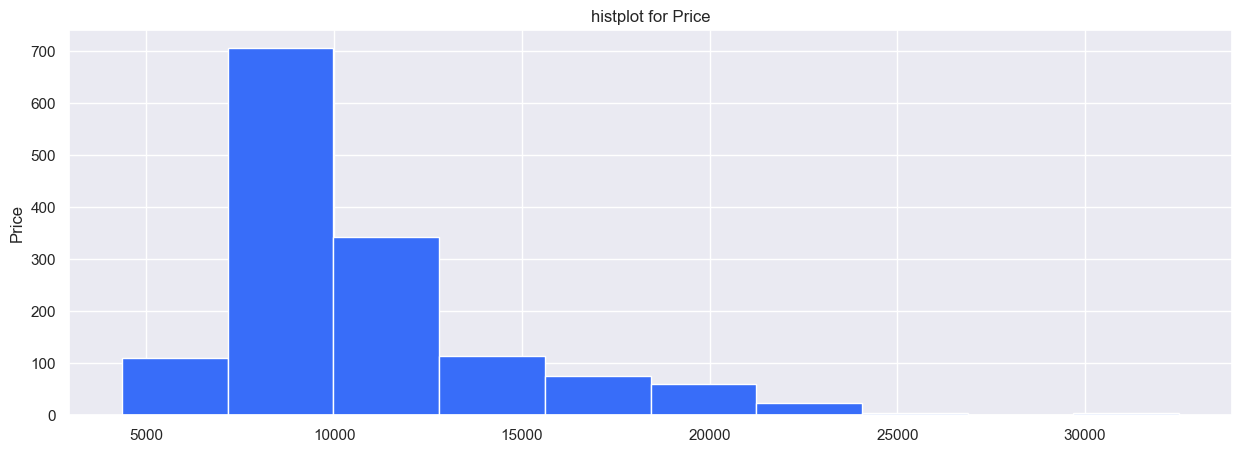

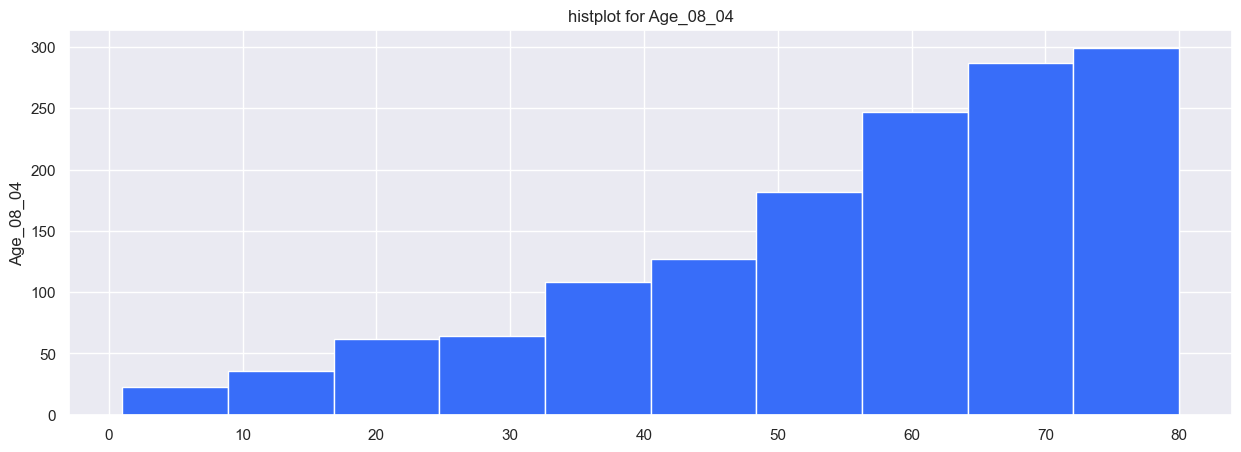

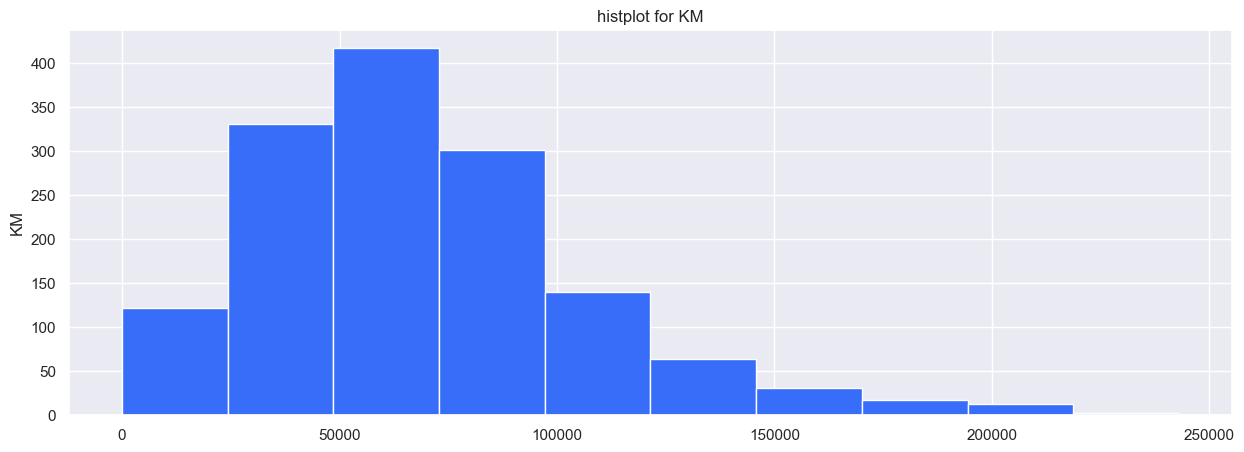

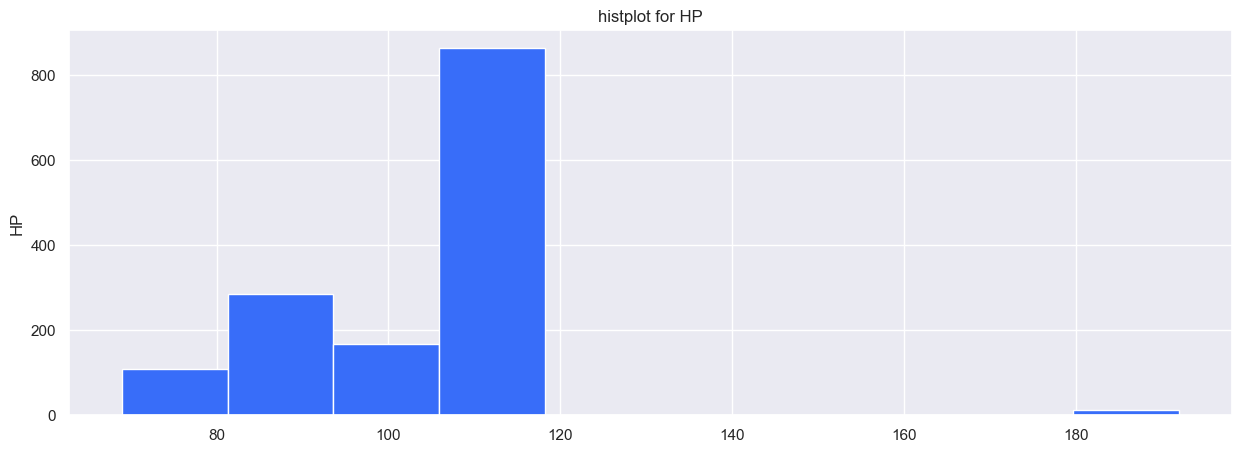

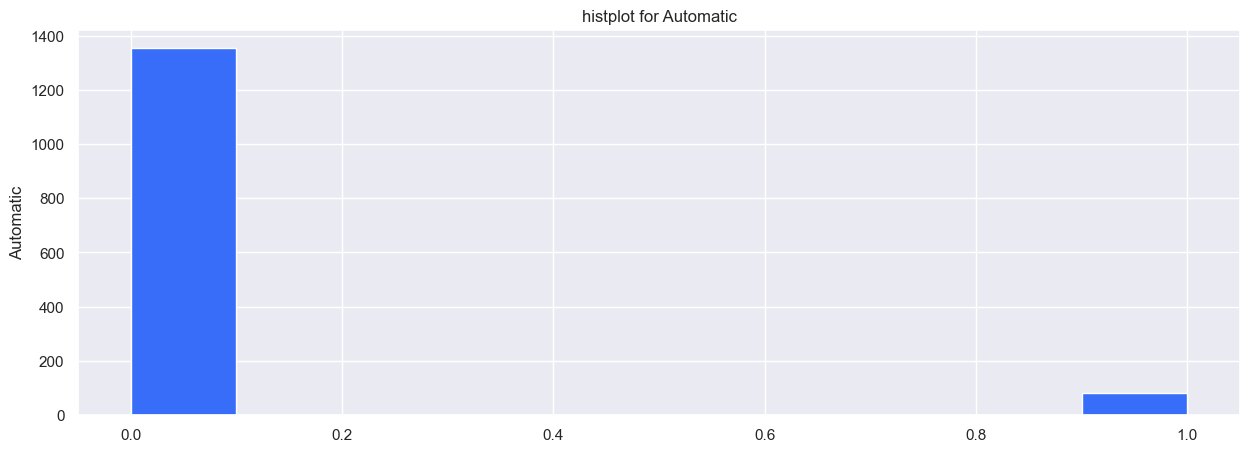

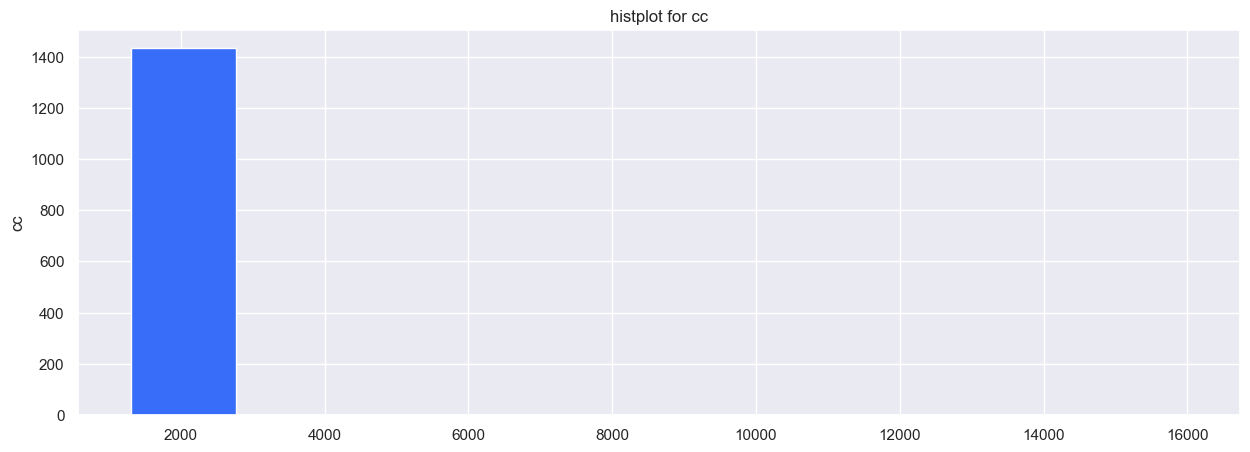

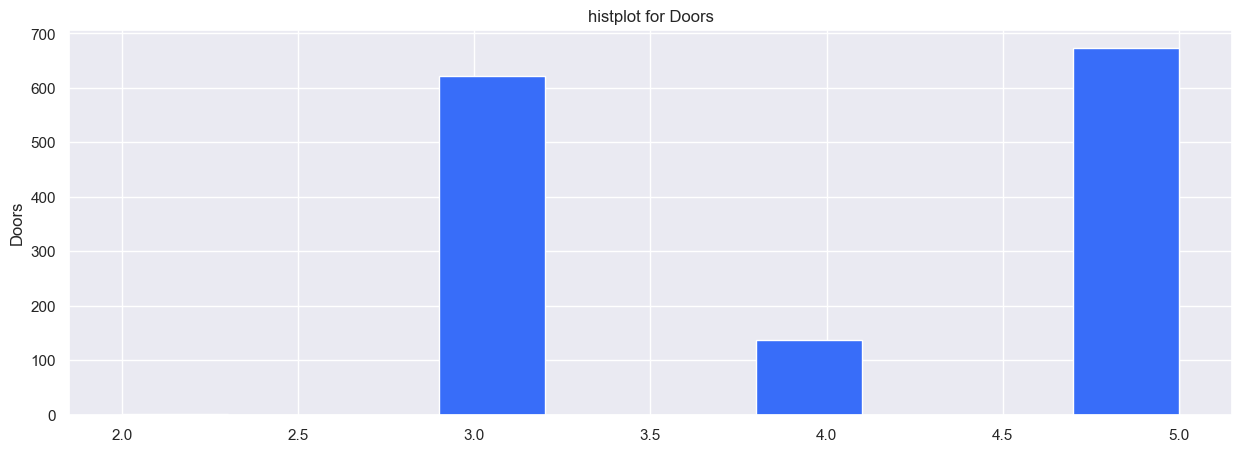

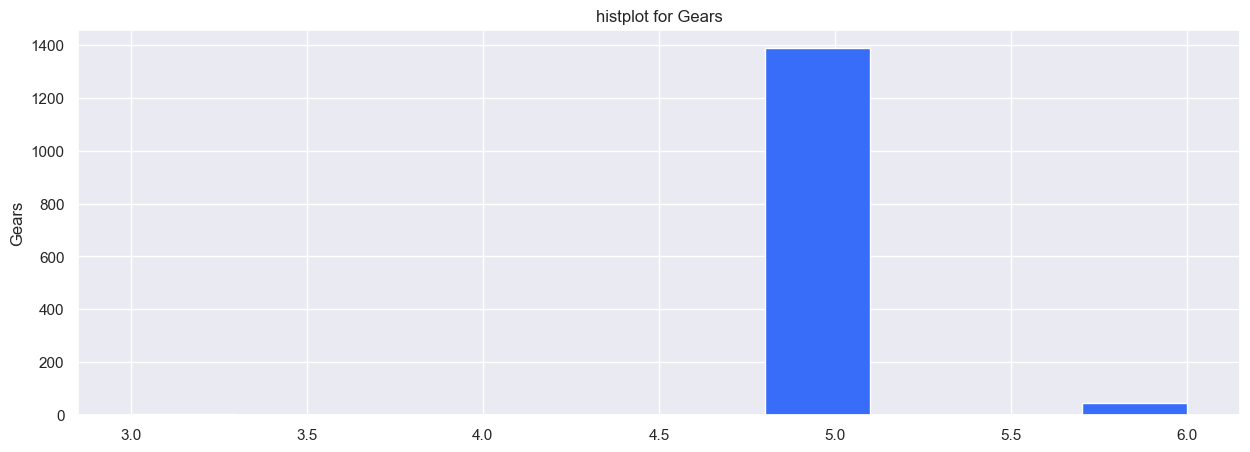

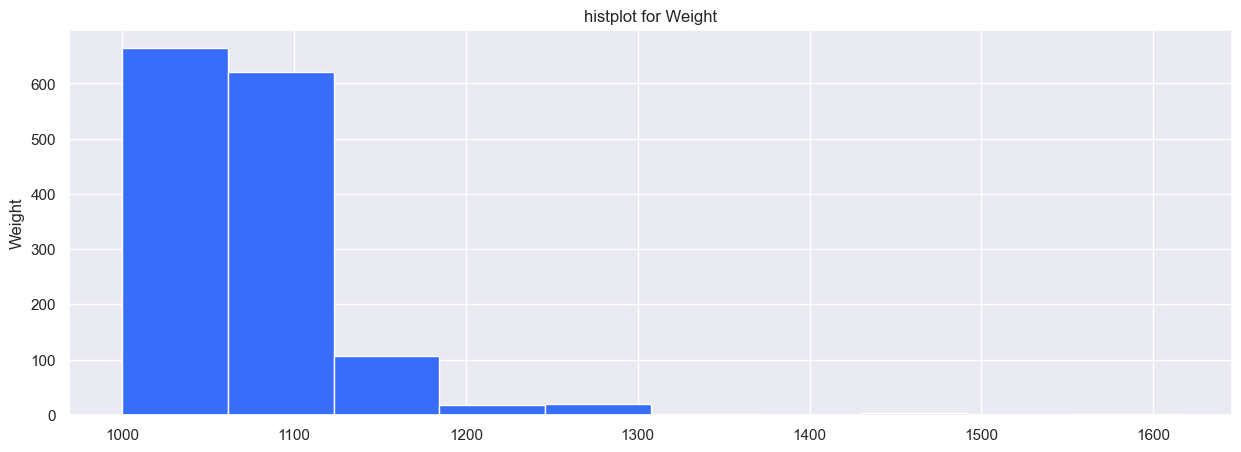

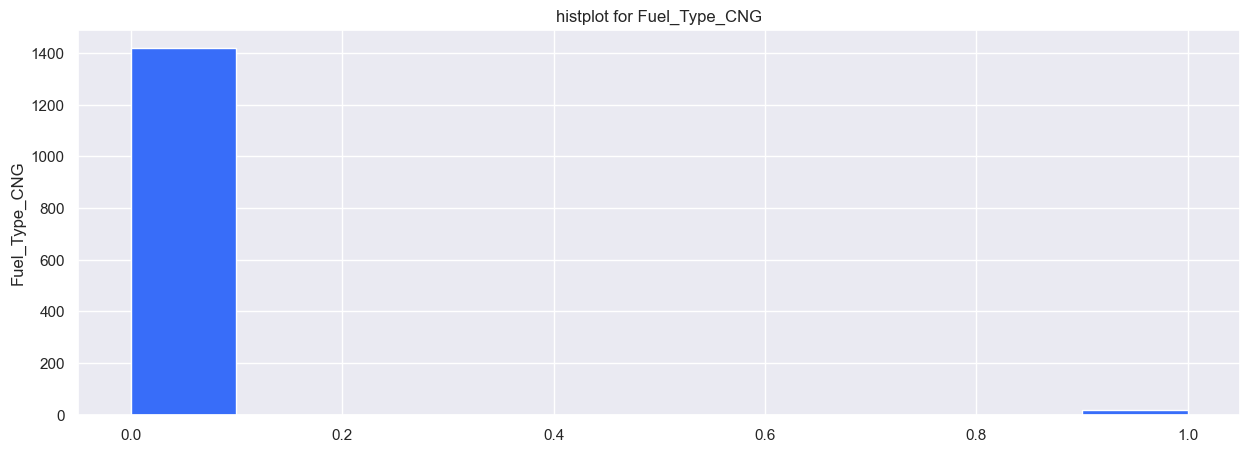

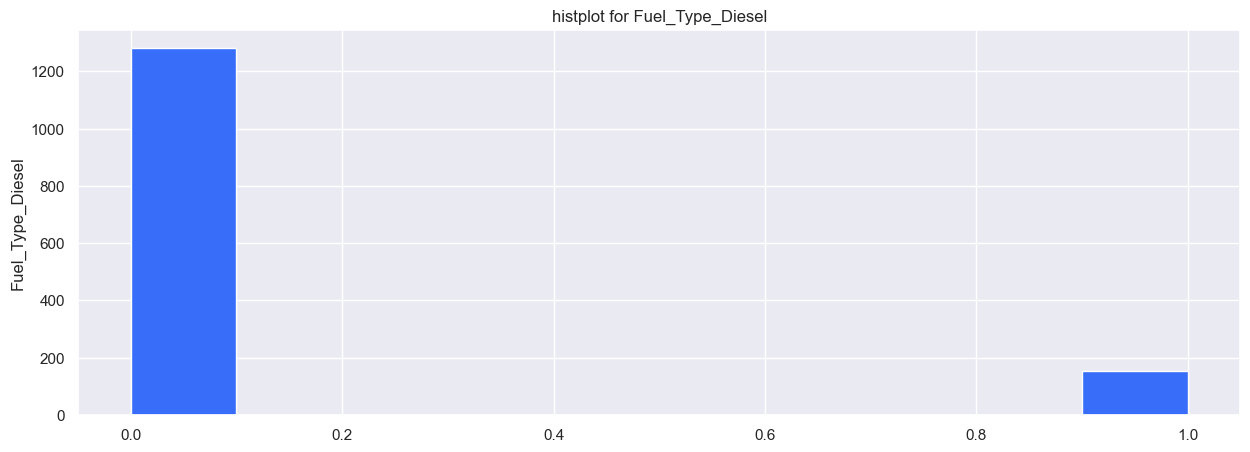

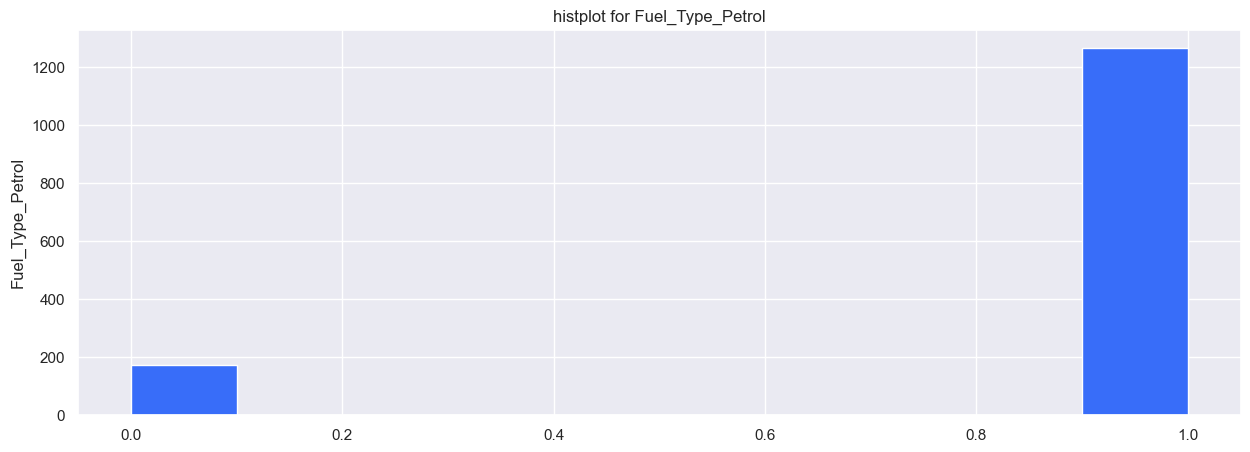

In [16]:
# Histogrph
for column in Toyato_corolla.columns:
    plt.figure(figsize=(15,5))  # Create a new figure for each plot
    plt.hist(Toyato_corolla[column])
    plt.title(f"histplot for {column}")
    plt.ylabel(column)
    plt.show()

# Find Outlier

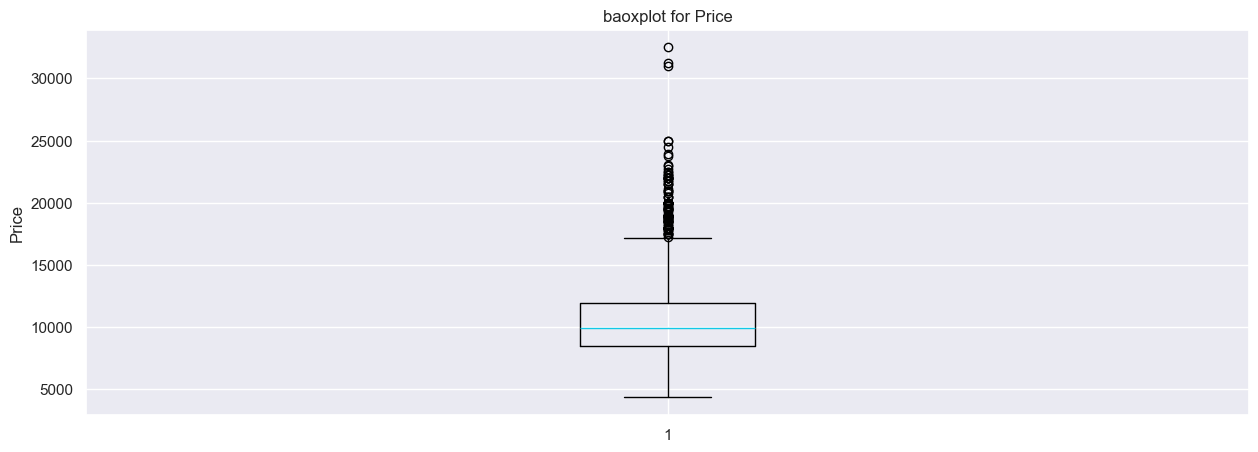

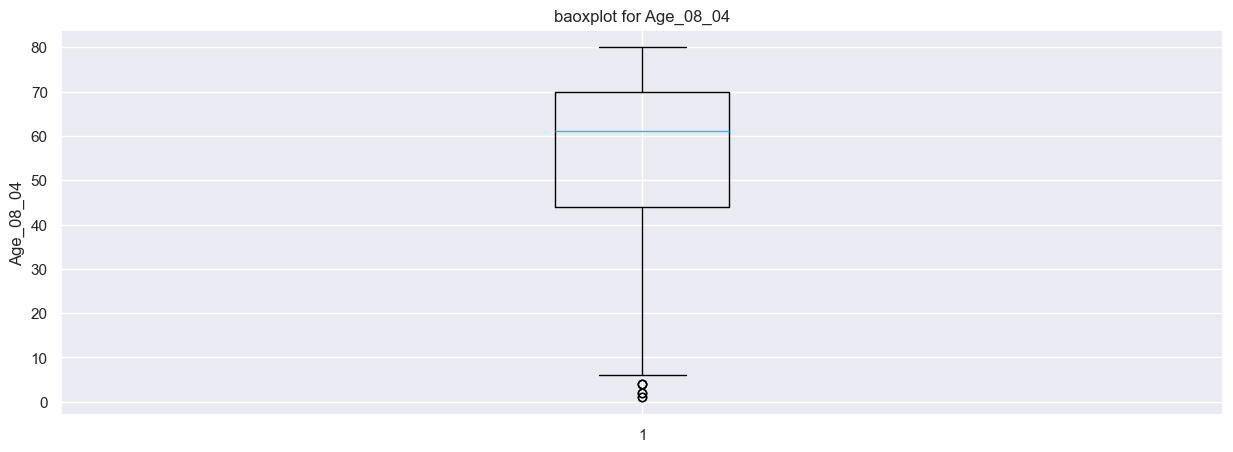

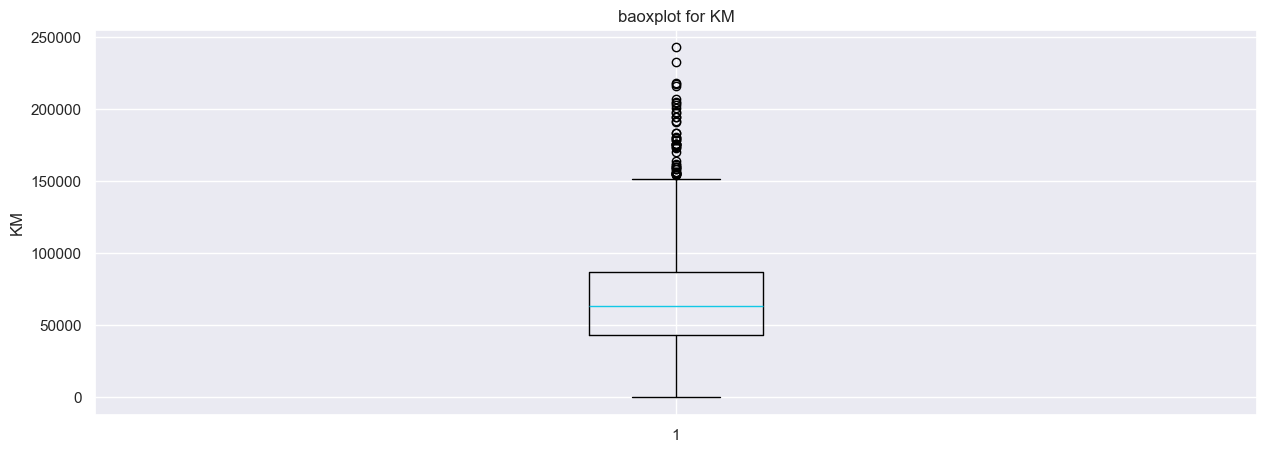

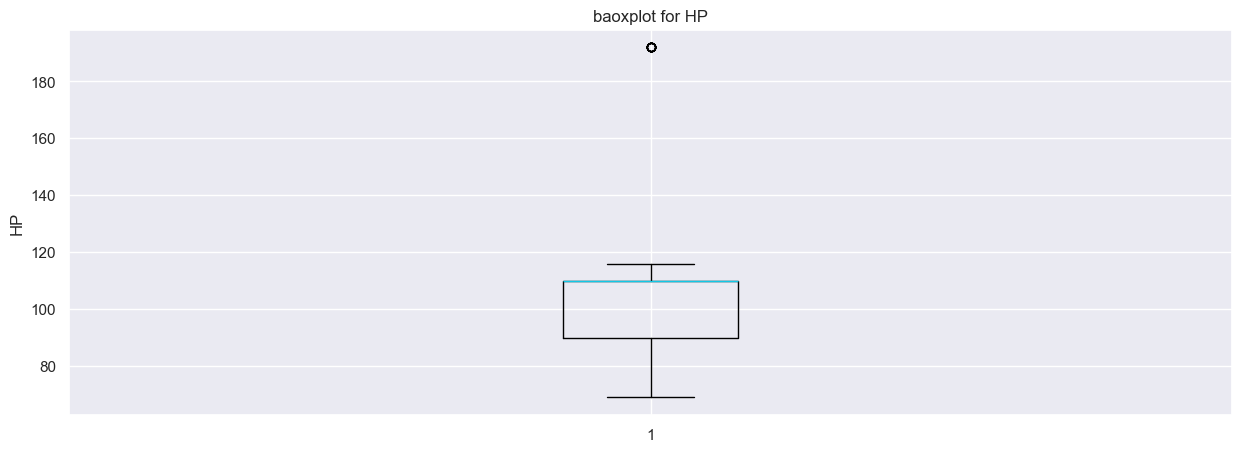

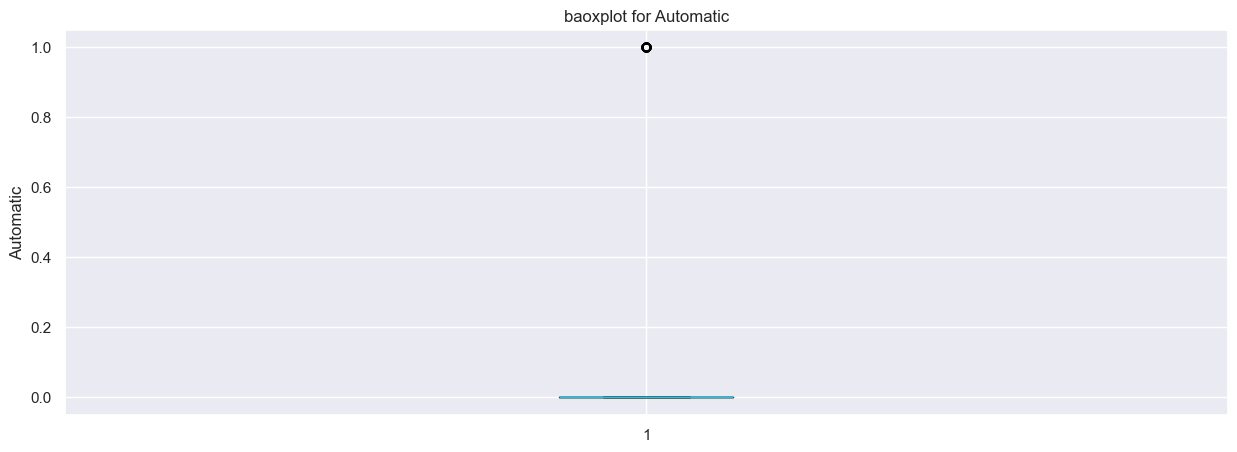

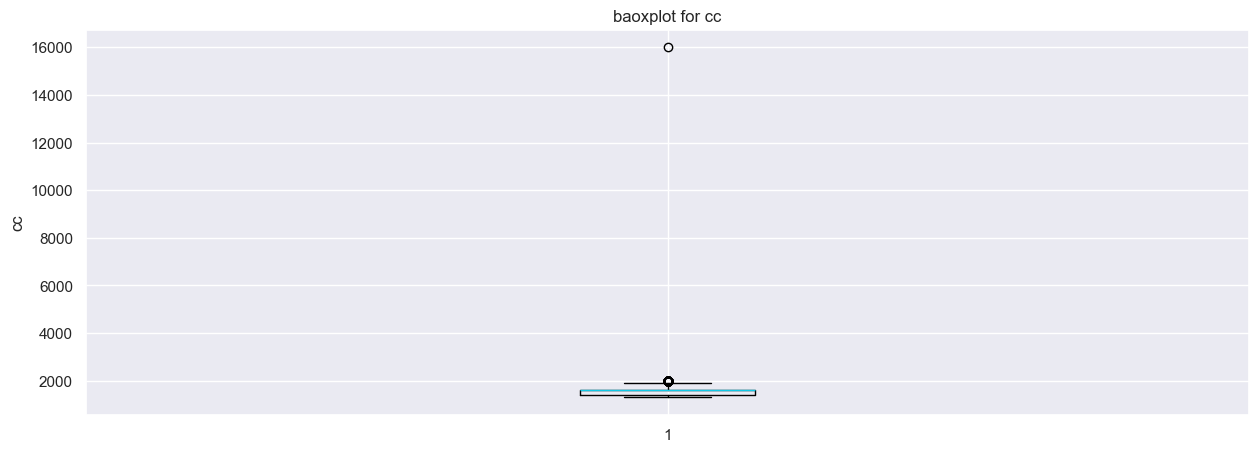

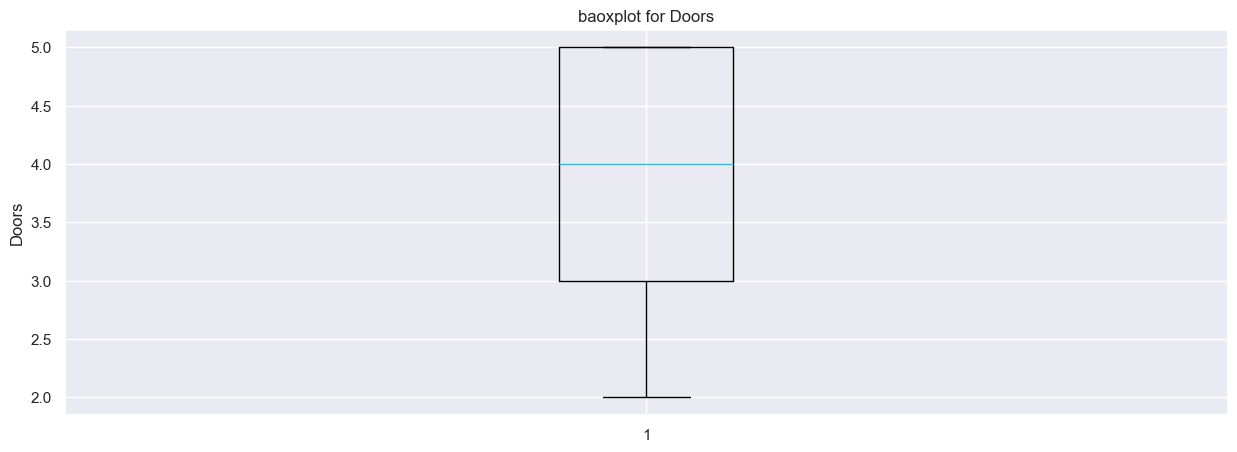

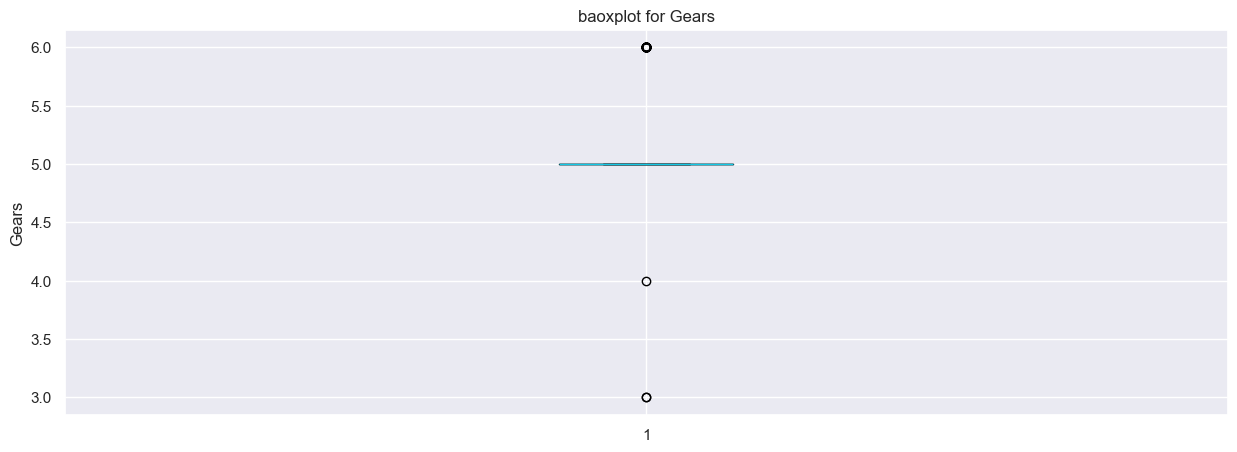

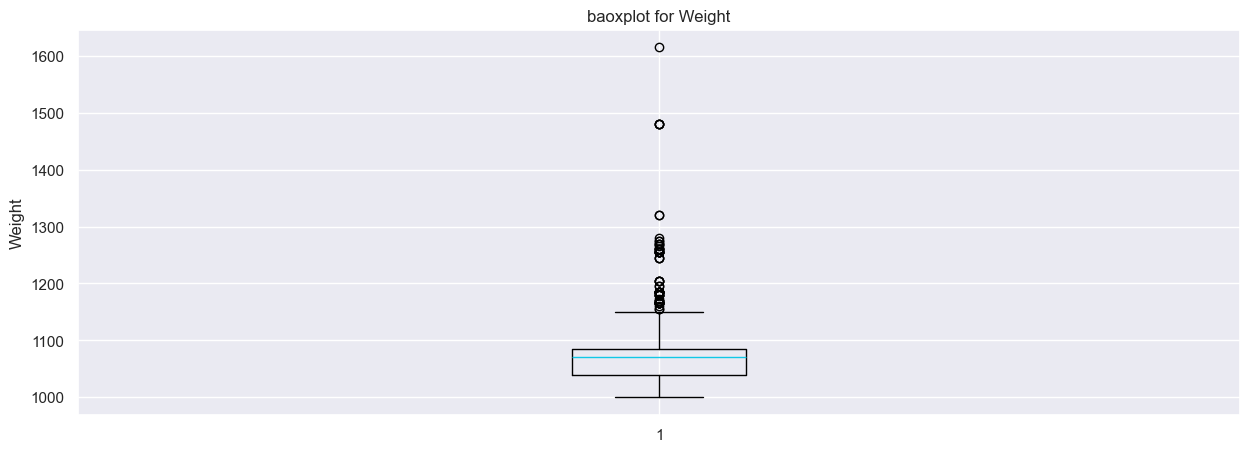

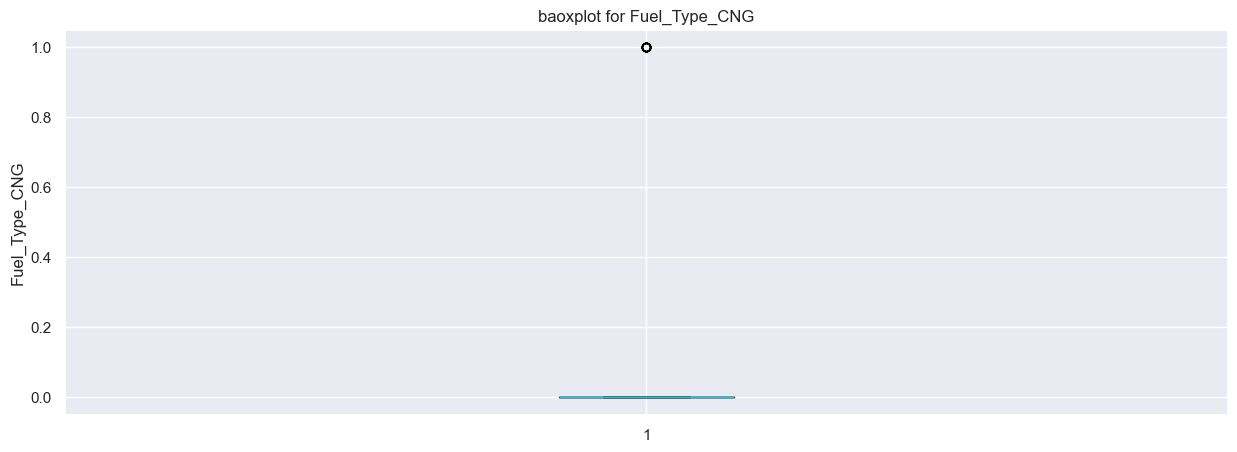

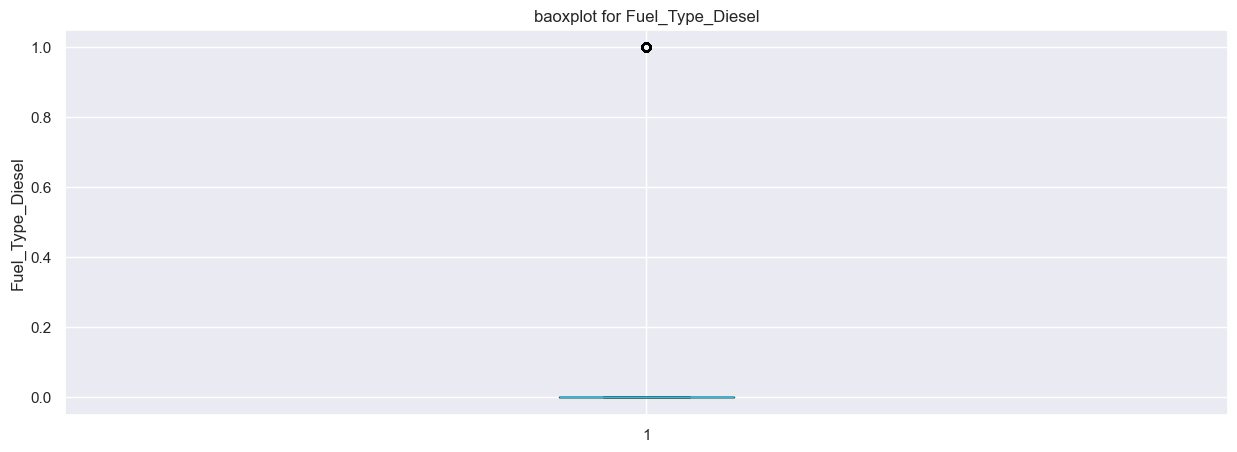

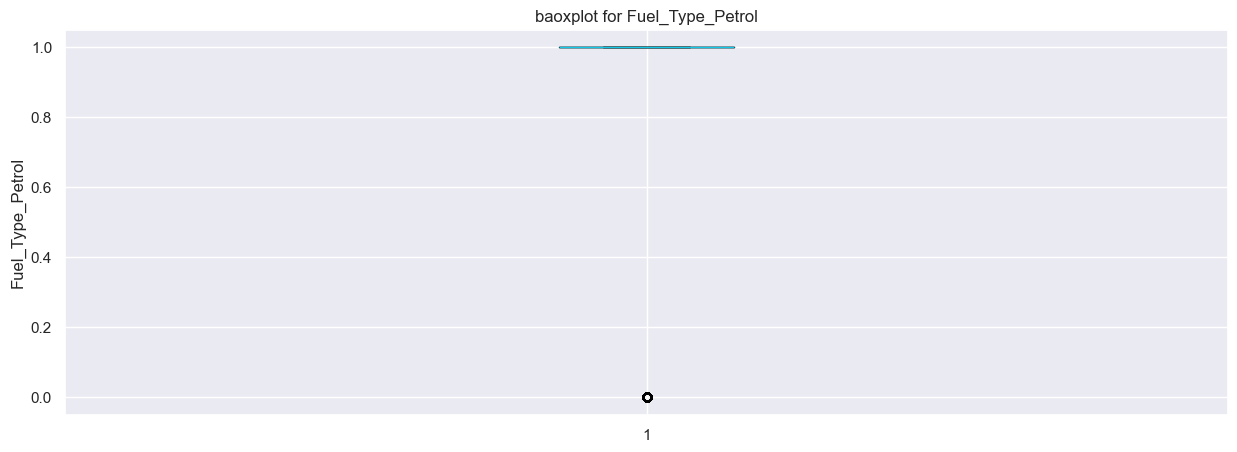

In [17]:
for column in Toyato_corolla.columns:
    plt.figure(figsize=(15,5))  # Create a new figure for each plot
    plt.boxplot(Toyato_corolla[column])
    plt.title(f"baoxplot for {column}")
    plt.ylabel(column)
    plt.show()



In [18]:
Toyato_corolla.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869,-0.039449,0.046612,-0.031356
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484,0.002198,-0.093058,0.088169
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,-0.023969,0.144013,0.407497,-0.437397
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143,0.062203,-0.537116,0.492362
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499,0.001467,-0.084248,0.079997
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077,0.006019,0.326780,-0.314200
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734,0.009761,0.023538,-0.025746
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238,-0.049548,-0.048706,0.063079
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000,0.053530,0.564649,-0.557315
Fuel_Type_CNG,-0.039449,0.002198,0.144013,0.062203,0.001467,0.006019,0.009761,-0.049548,0.053530,1.000000,-0.037964,-0.297688


<Axes: >

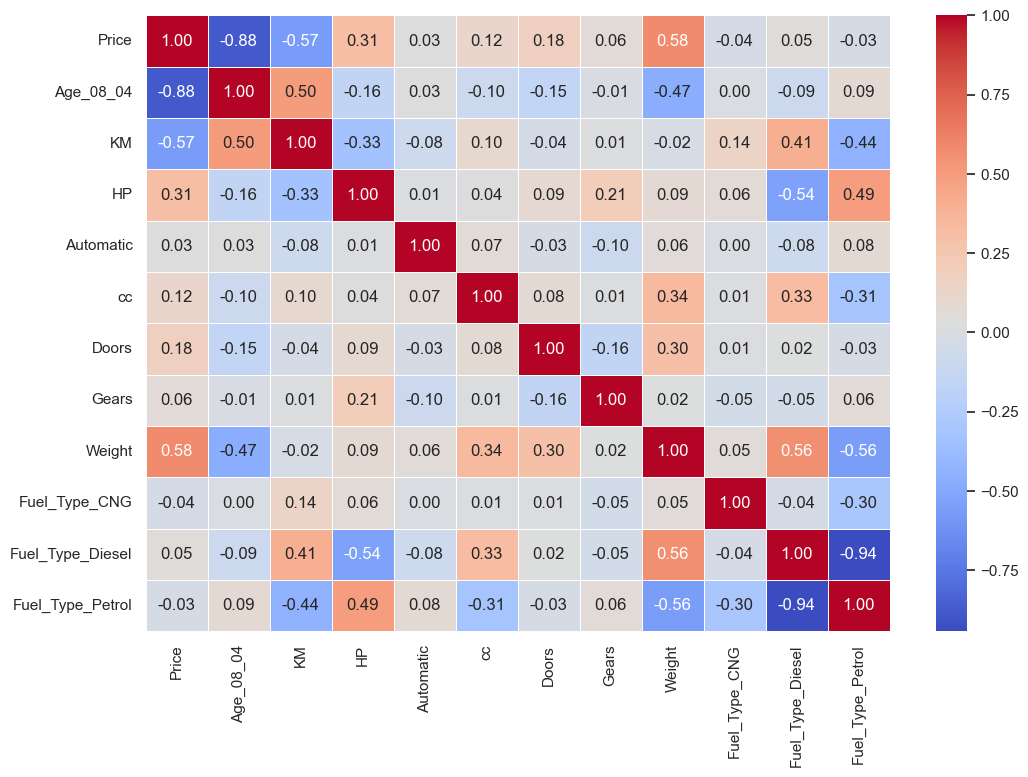

In [68]:
# Heatmap of correlation
plt.figure(figsize=(12,8))
sns.heatmap(Toyato_corolla.corr(),annot=True, cmap='coolwarm',fmt=('.2f'),linewidths=0.5)

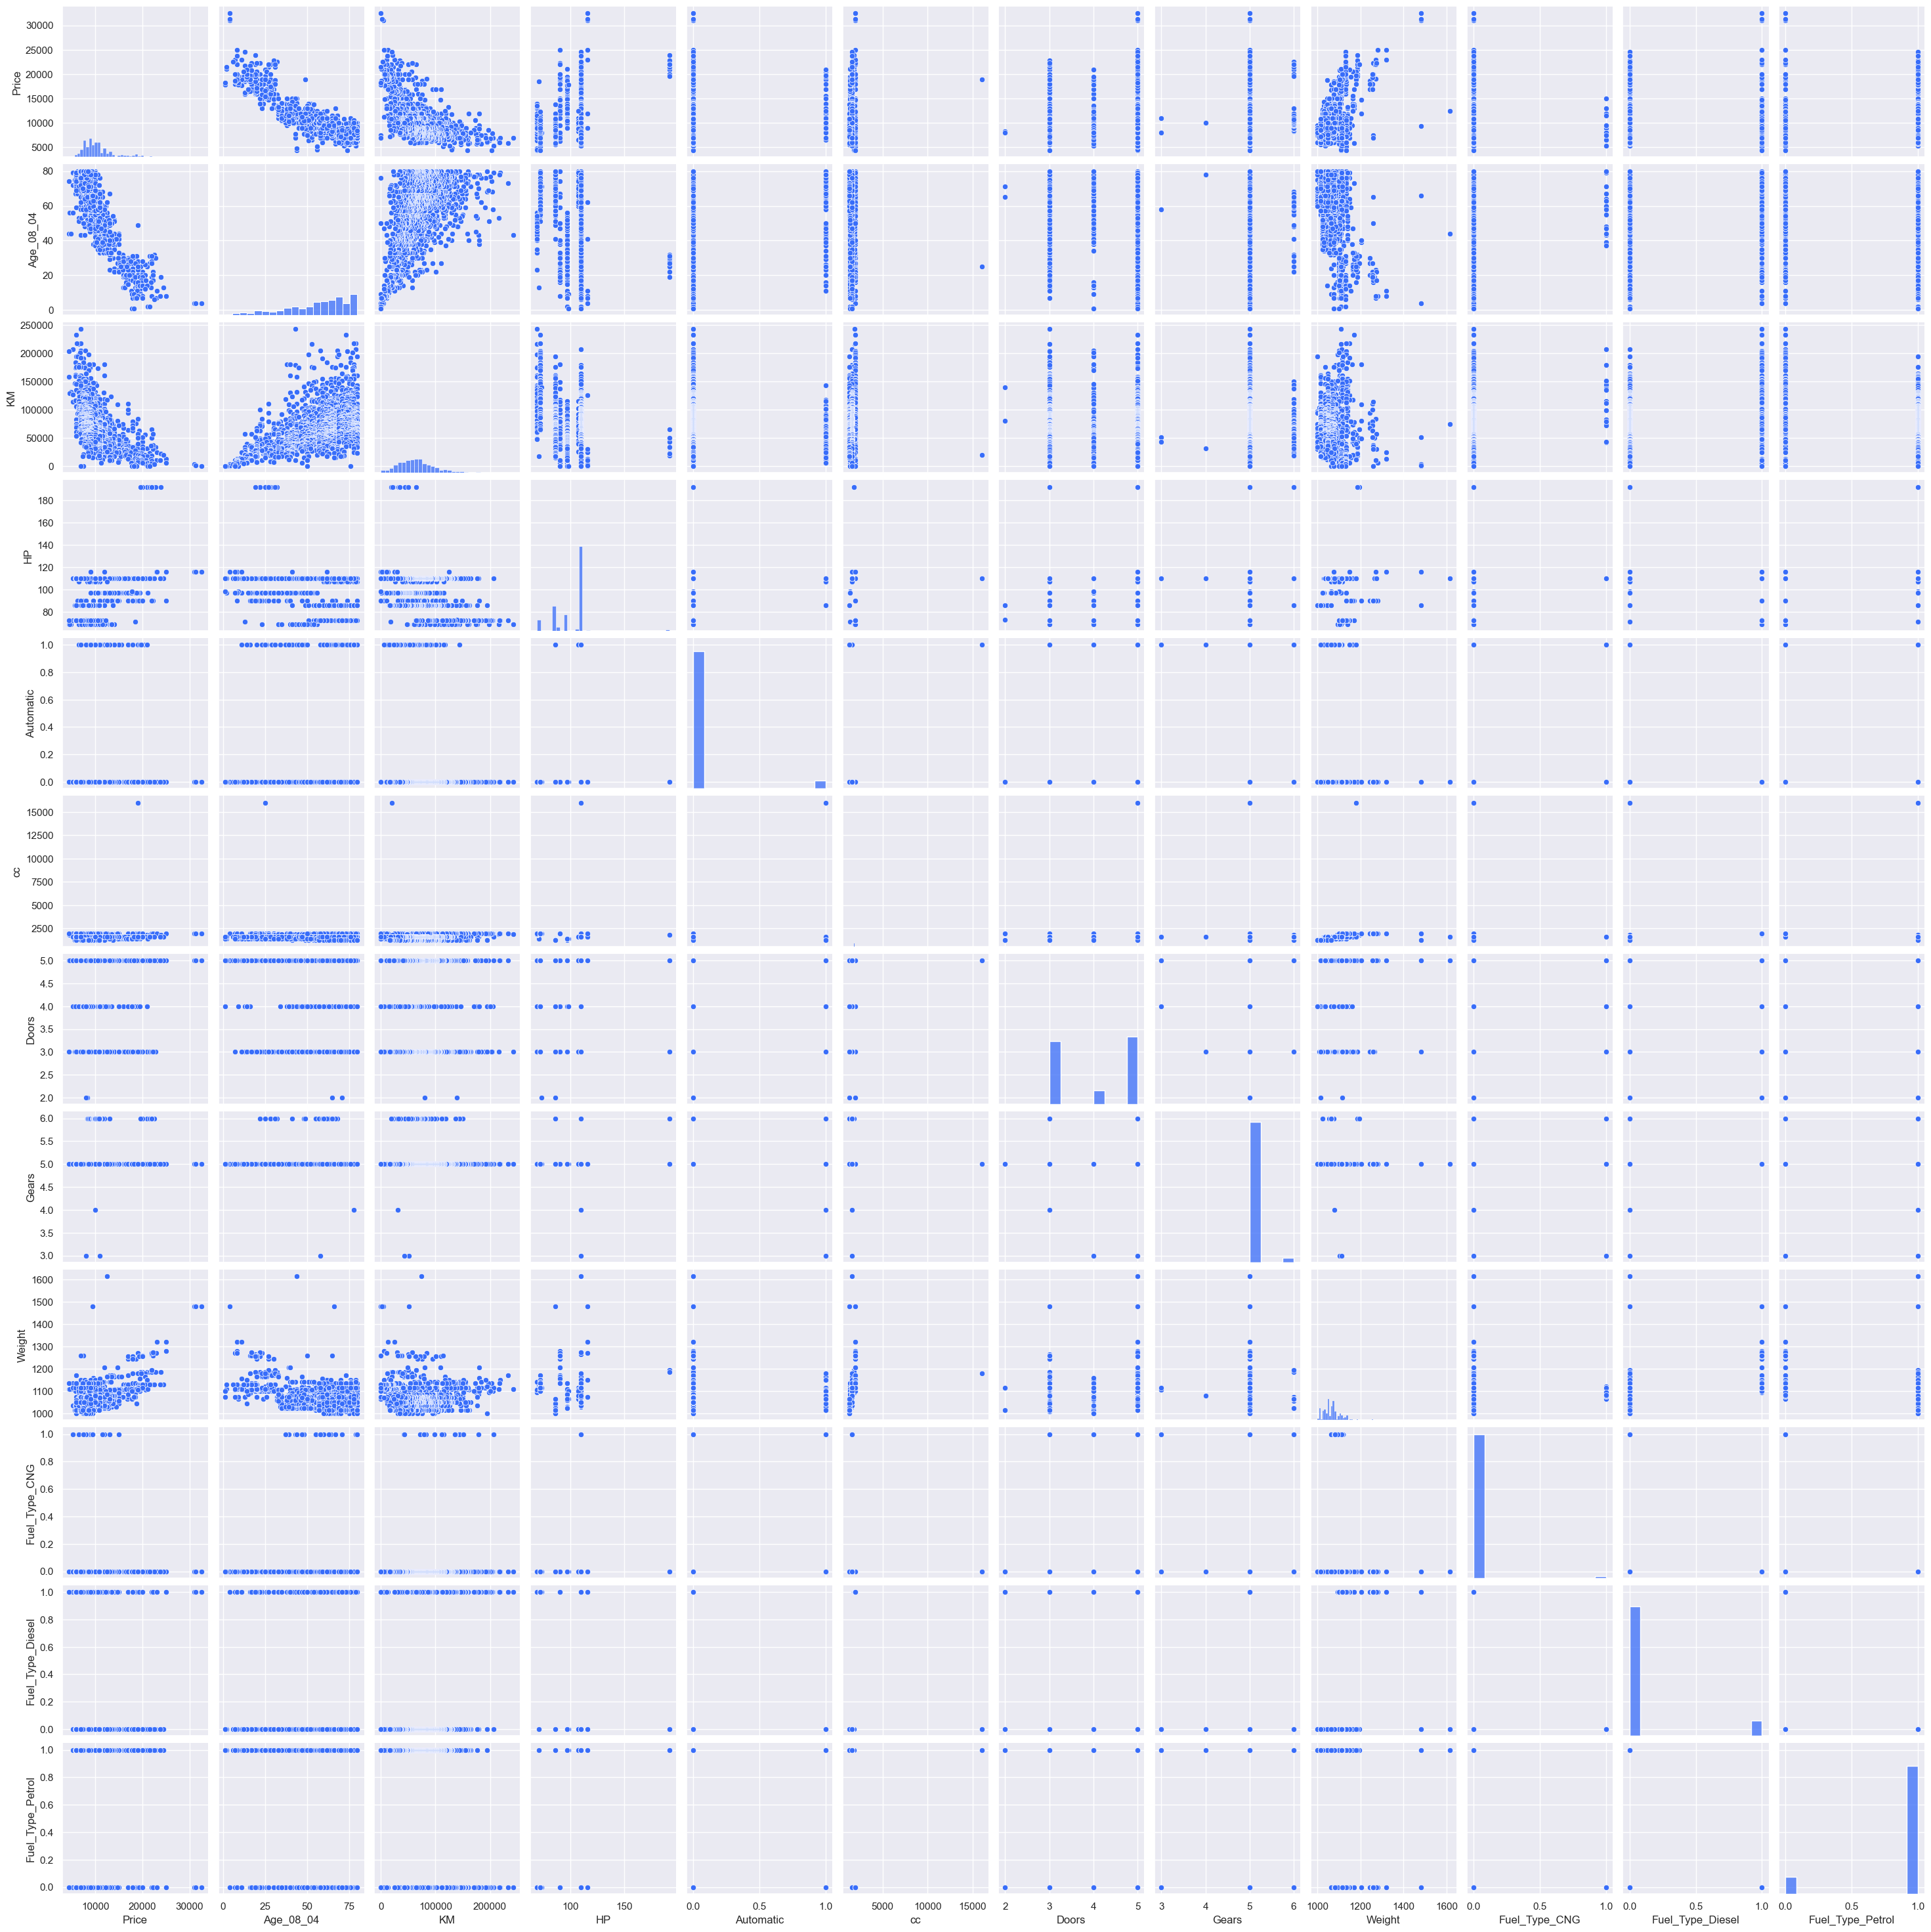

In [69]:
sns.pairplot(Toyato_corolla)

# Split Data into train and test

In [19]:
x=Toyato_corolla.drop(columns=['Price'])
y=Toyato_corolla['Price']
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1435, dtype: int64

In [20]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,0,1,0
1,23,72937,90,0,2000,3,5,1165,0,1,0
2,24,41711,90,0,2000,3,5,1165,0,1,0
3,26,48000,90,0,2000,3,5,1165,0,1,0
4,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,0,0,1
1432,72,19000,86,0,1300,3,5,1015,0,0,1
1433,71,17016,86,0,1300,3,5,1015,0,0,1
1434,70,16916,86,0,1300,3,5,1015,0,0,1


In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [22]:
xtrain.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
989,59,43818,110,0,1600,5,5,1070,0,0,1
907,65,58829,110,0,1600,3,5,1050,0,0,1
1318,78,67255,110,0,1600,5,5,1085,0,0,1
818,62,70500,110,0,1600,5,5,1035,0,0,1
661,65,111769,110,0,1600,3,6,1065,0,0,1


In [23]:
ytrain.head()

989     9950
907     8950
1318    8500
818     8950
661     9750
Name: Price, dtype: int64

In [24]:
xtest.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
755,62,80265,86,0,1300,3,5,1015,0,0,1
436,47,78785,110,0,1600,5,5,1119,1,0,0
322,37,36074,110,1,1600,5,5,1075,0,0,1
1394,80,49580,110,0,1600,4,5,1035,0,0,1
289,43,43632,110,0,1600,5,5,1075,0,0,1


In [25]:
ytest.head()

755      8750
436     11500
322     13950
1394     7450
289     12950
Name: Price, dtype: int64

# Model Building

In [26]:
model=smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=Toyato_corolla).fit()

# 1.Residual Plot(Homoscaracity)

In [27]:
model.params

Intercept          -6895.217001
Age_08_04           -123.840430
KM                    -0.017416
HP                    23.314614
Automatic            303.253603
cc                    -0.052021
Doors                -29.884035
Gears                627.081986
Weight                20.706603
Fuel_Type_CNG      -2858.978150
Fuel_Type_Diesel   -2321.979227
Fuel_Type_Petrol   -1714.259624
dtype: float64

In [28]:
model.rsquared

0.8637648551448405

In [29]:
model.fittedvalues

0       16279.391959
1       15827.430557
2       16247.420682
3       15890.210892
4       15663.833741
            ...     
1431     8695.195996
1432     8143.498909
1433     8301.892590
1434     8427.474616
1435    10513.153028
Length: 1435, dtype: float64

In [30]:
model.resid

0      -2779.391959
1      -2077.430557
2      -2297.420682
3       -940.210892
4      -1913.833741
           ...     
1431   -1195.195996
1432    2701.501091
1433     198.107410
1434   -1177.474616
1435   -3563.153028
Length: 1435, dtype: float64

Text(0, 0.5, 'redidal value')

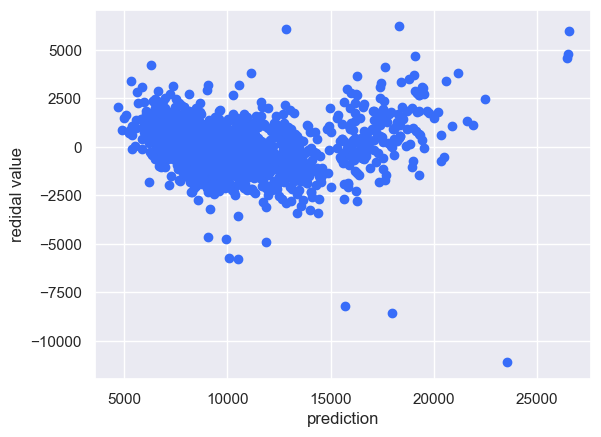

In [31]:
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('prediction')
plt.ylabel('redidal value')

# 2 QQPlot(Best Fitted Value)

In [32]:
model.params

Intercept          -6895.217001
Age_08_04           -123.840430
KM                    -0.017416
HP                    23.314614
Automatic            303.253603
cc                    -0.052021
Doors                -29.884035
Gears                627.081986
Weight                20.706603
Fuel_Type_CNG      -2858.978150
Fuel_Type_Diesel   -2321.979227
Fuel_Type_Petrol   -1714.259624
dtype: float64

In [33]:
model.fittedvalues

0       16279.391959
1       15827.430557
2       16247.420682
3       15890.210892
4       15663.833741
            ...     
1431     8695.195996
1432     8143.498909
1433     8301.892590
1434     8427.474616
1435    10513.153028
Length: 1435, dtype: float64

In [34]:
model.resid

0      -2779.391959
1      -2077.430557
2      -2297.420682
3       -940.210892
4      -1913.833741
           ...     
1431   -1195.195996
1432    2701.501091
1433     198.107410
1434   -1177.474616
1435   -3563.153028
Length: 1435, dtype: float64

In [35]:
import statsmodels.api as sm # to get qq plot

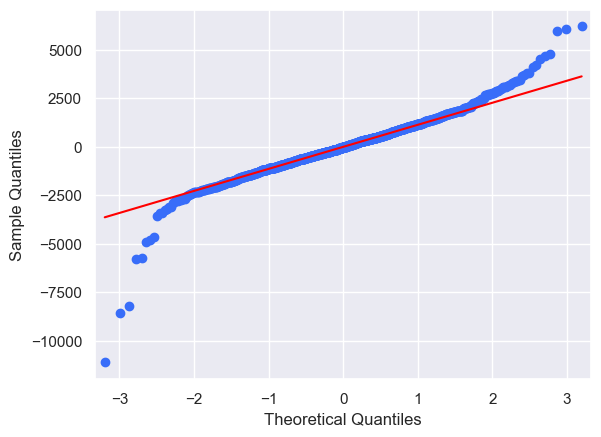

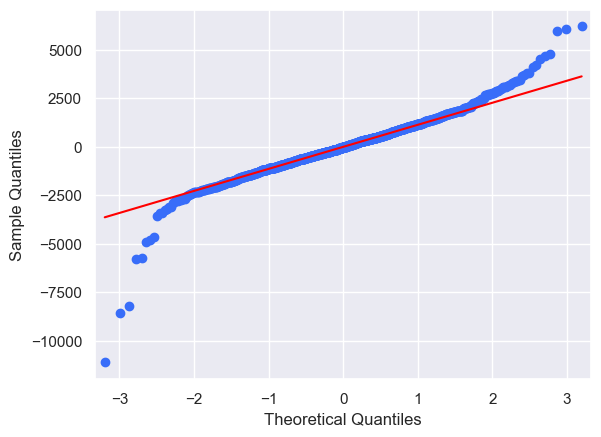

In [36]:
sm.qqplot(model.resid,line='q') # for avoid repeated Visualization

# Residual Vs Regressor

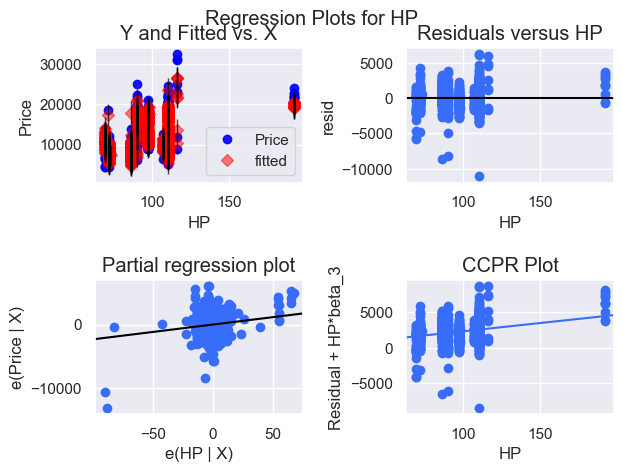

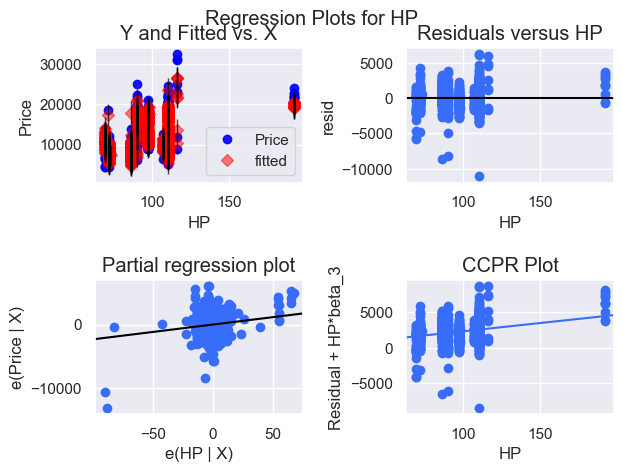

In [37]:
sm.graphics.plot_regress_exog(model,'HP')

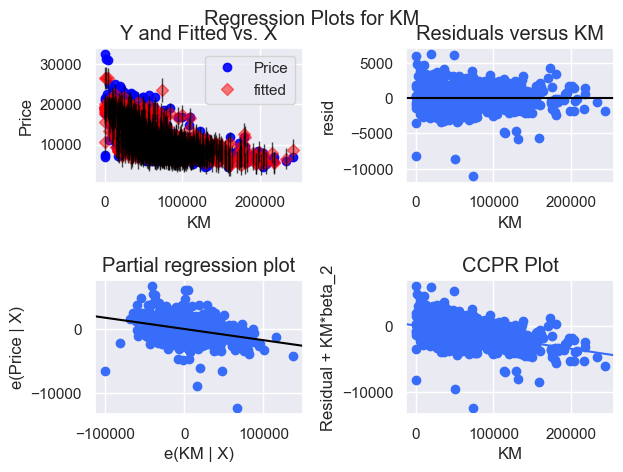

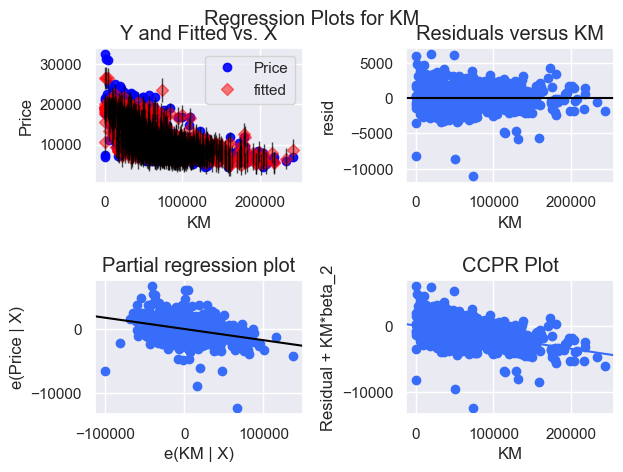

In [38]:
sm.graphics.plot_regress_exog(model,'KM')

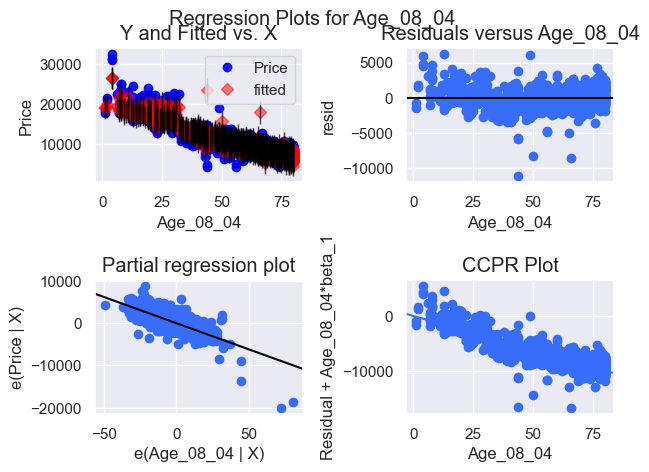

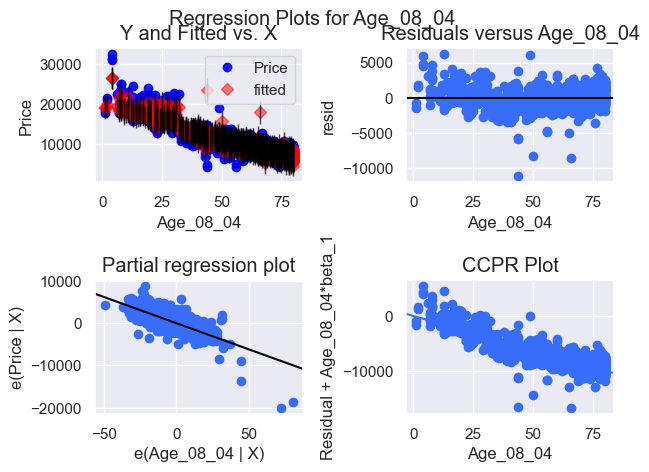

In [39]:
sm.graphics.plot_regress_exog(model,'Age_08_04')

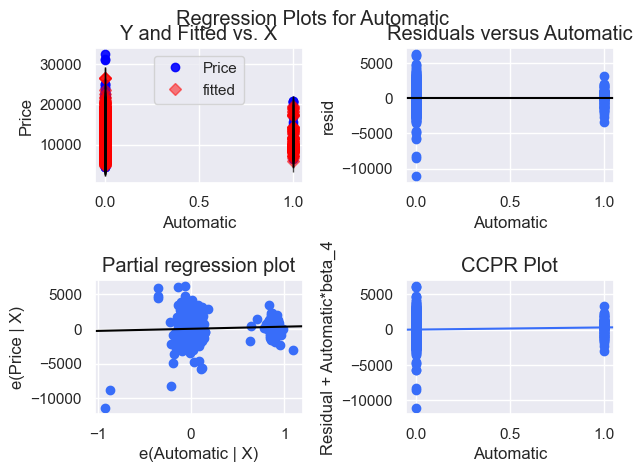

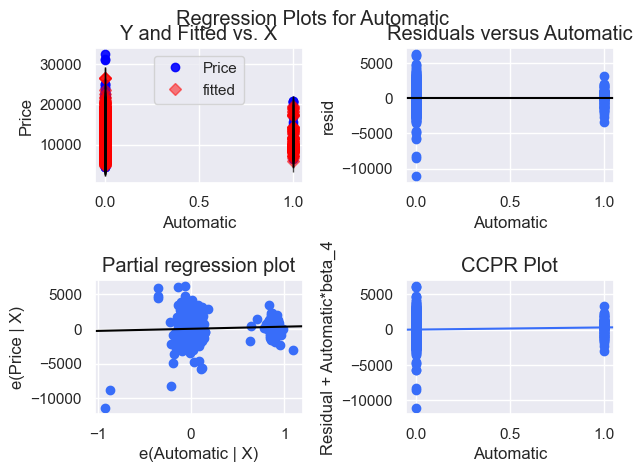

In [40]:
sm.graphics.plot_regress_exog(model,'Automatic')

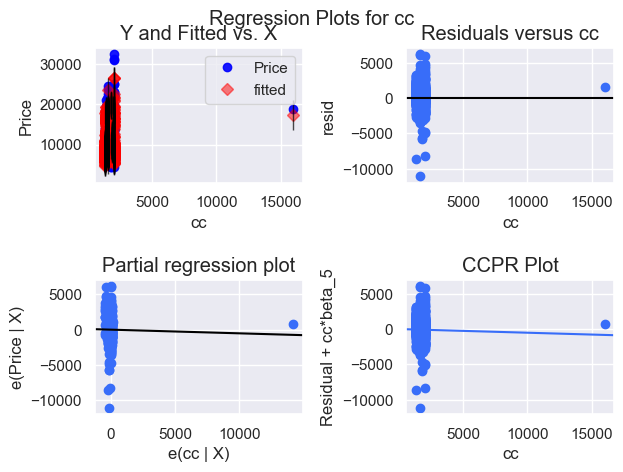

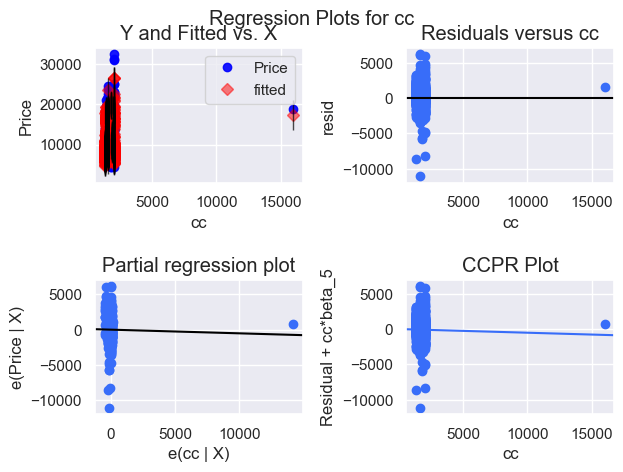

In [41]:
sm.graphics.plot_regress_exog(model,'cc')

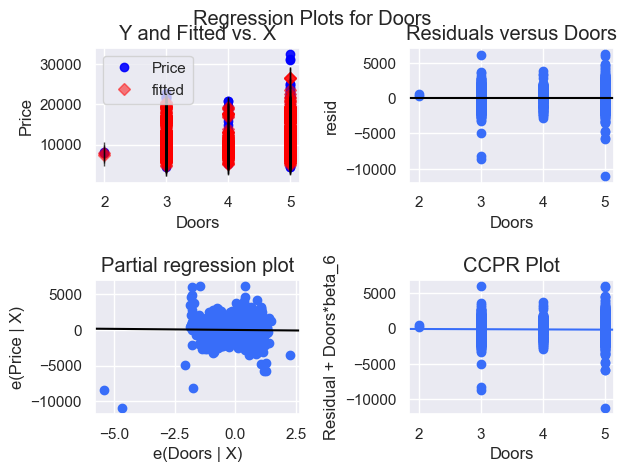

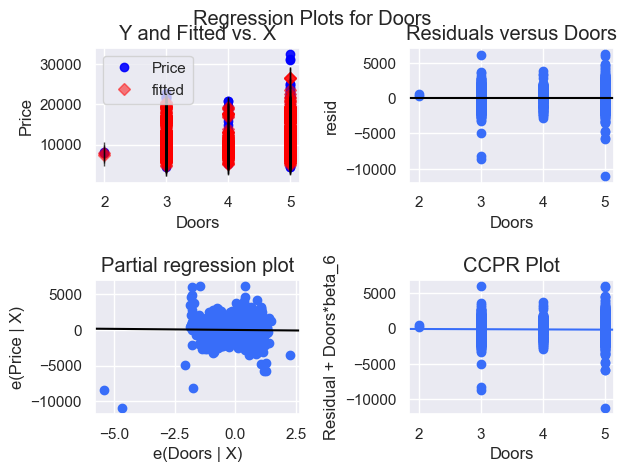

In [42]:
sm.graphics.plot_regress_exog(model,'Doors')

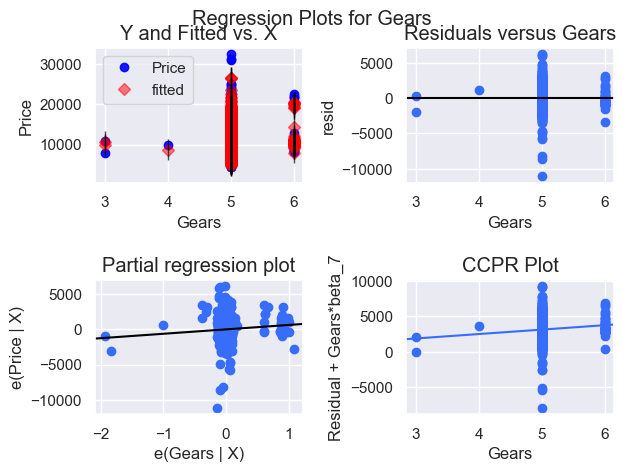

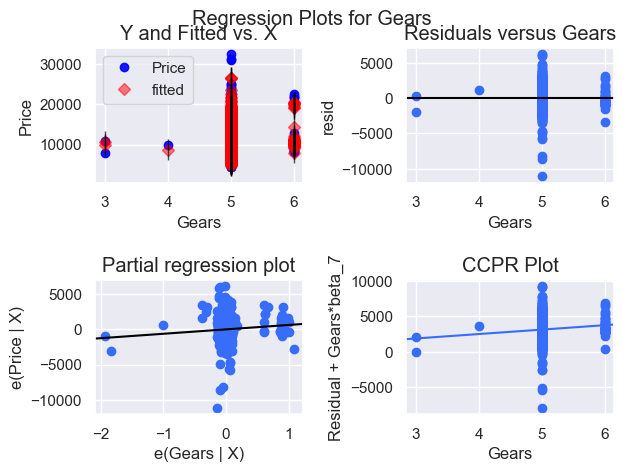

In [43]:
sm.graphics.plot_regress_exog(model,'Gears')

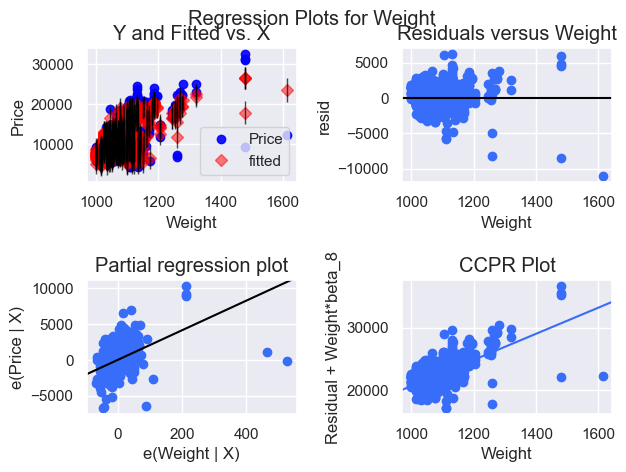

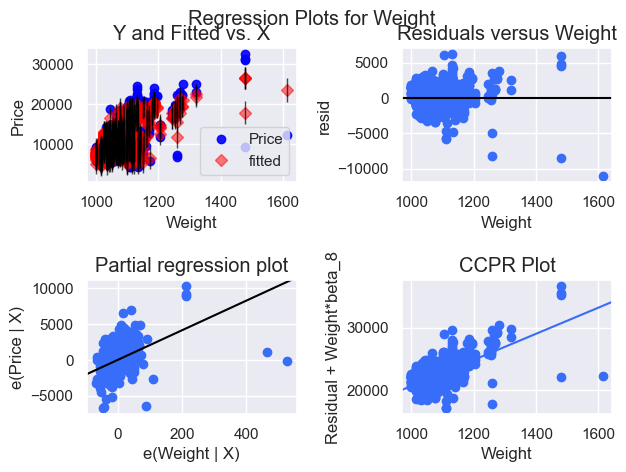

In [44]:
sm.graphics.plot_regress_exog(model,'Weight')

# Model Detection Diagnostics (checking Outliers or Influencers)

## Two Techniques : 1. Cook's Distance & 2. Leverage value

In [45]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([4.20329555e-03, 2.12736364e-03, 2.95311457e-03, ...,
       1.24558008e-05, 4.30330817e-04, 7.04076283e-03])

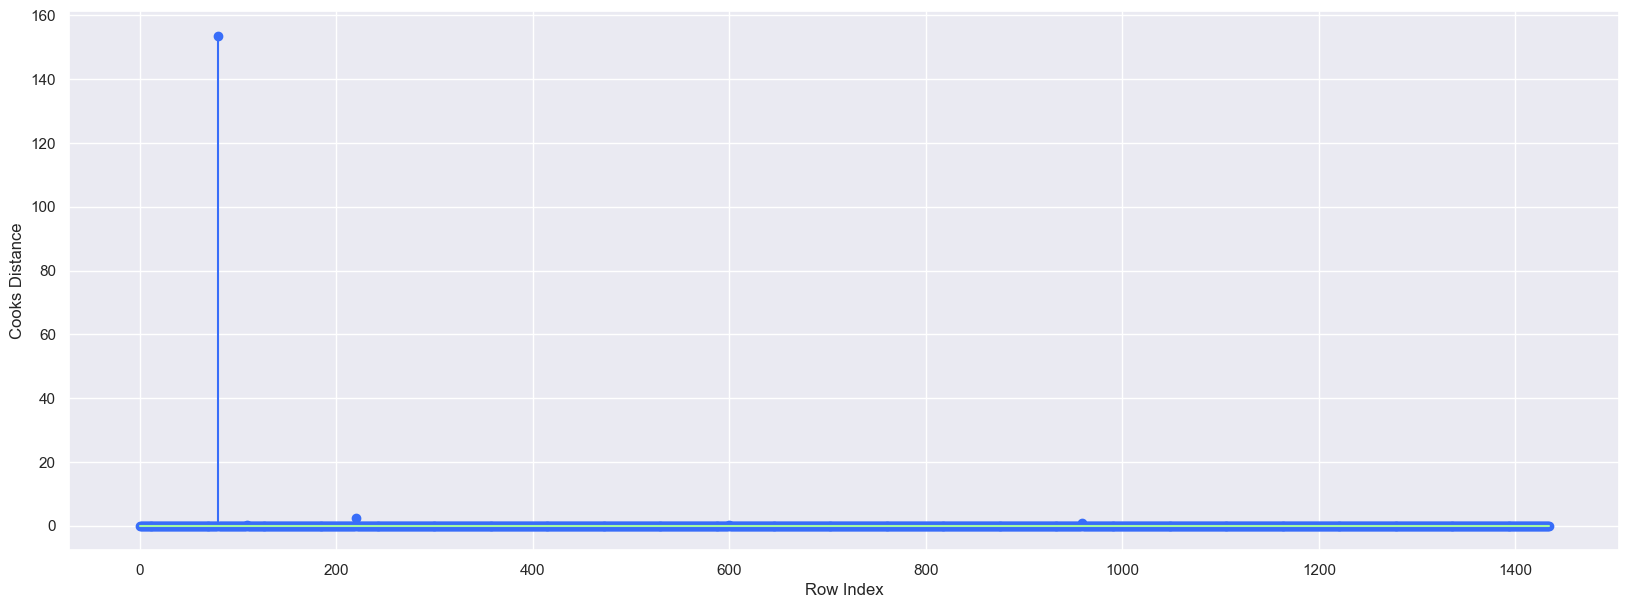

In [46]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Toyato_corolla)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 153.5889262476143)

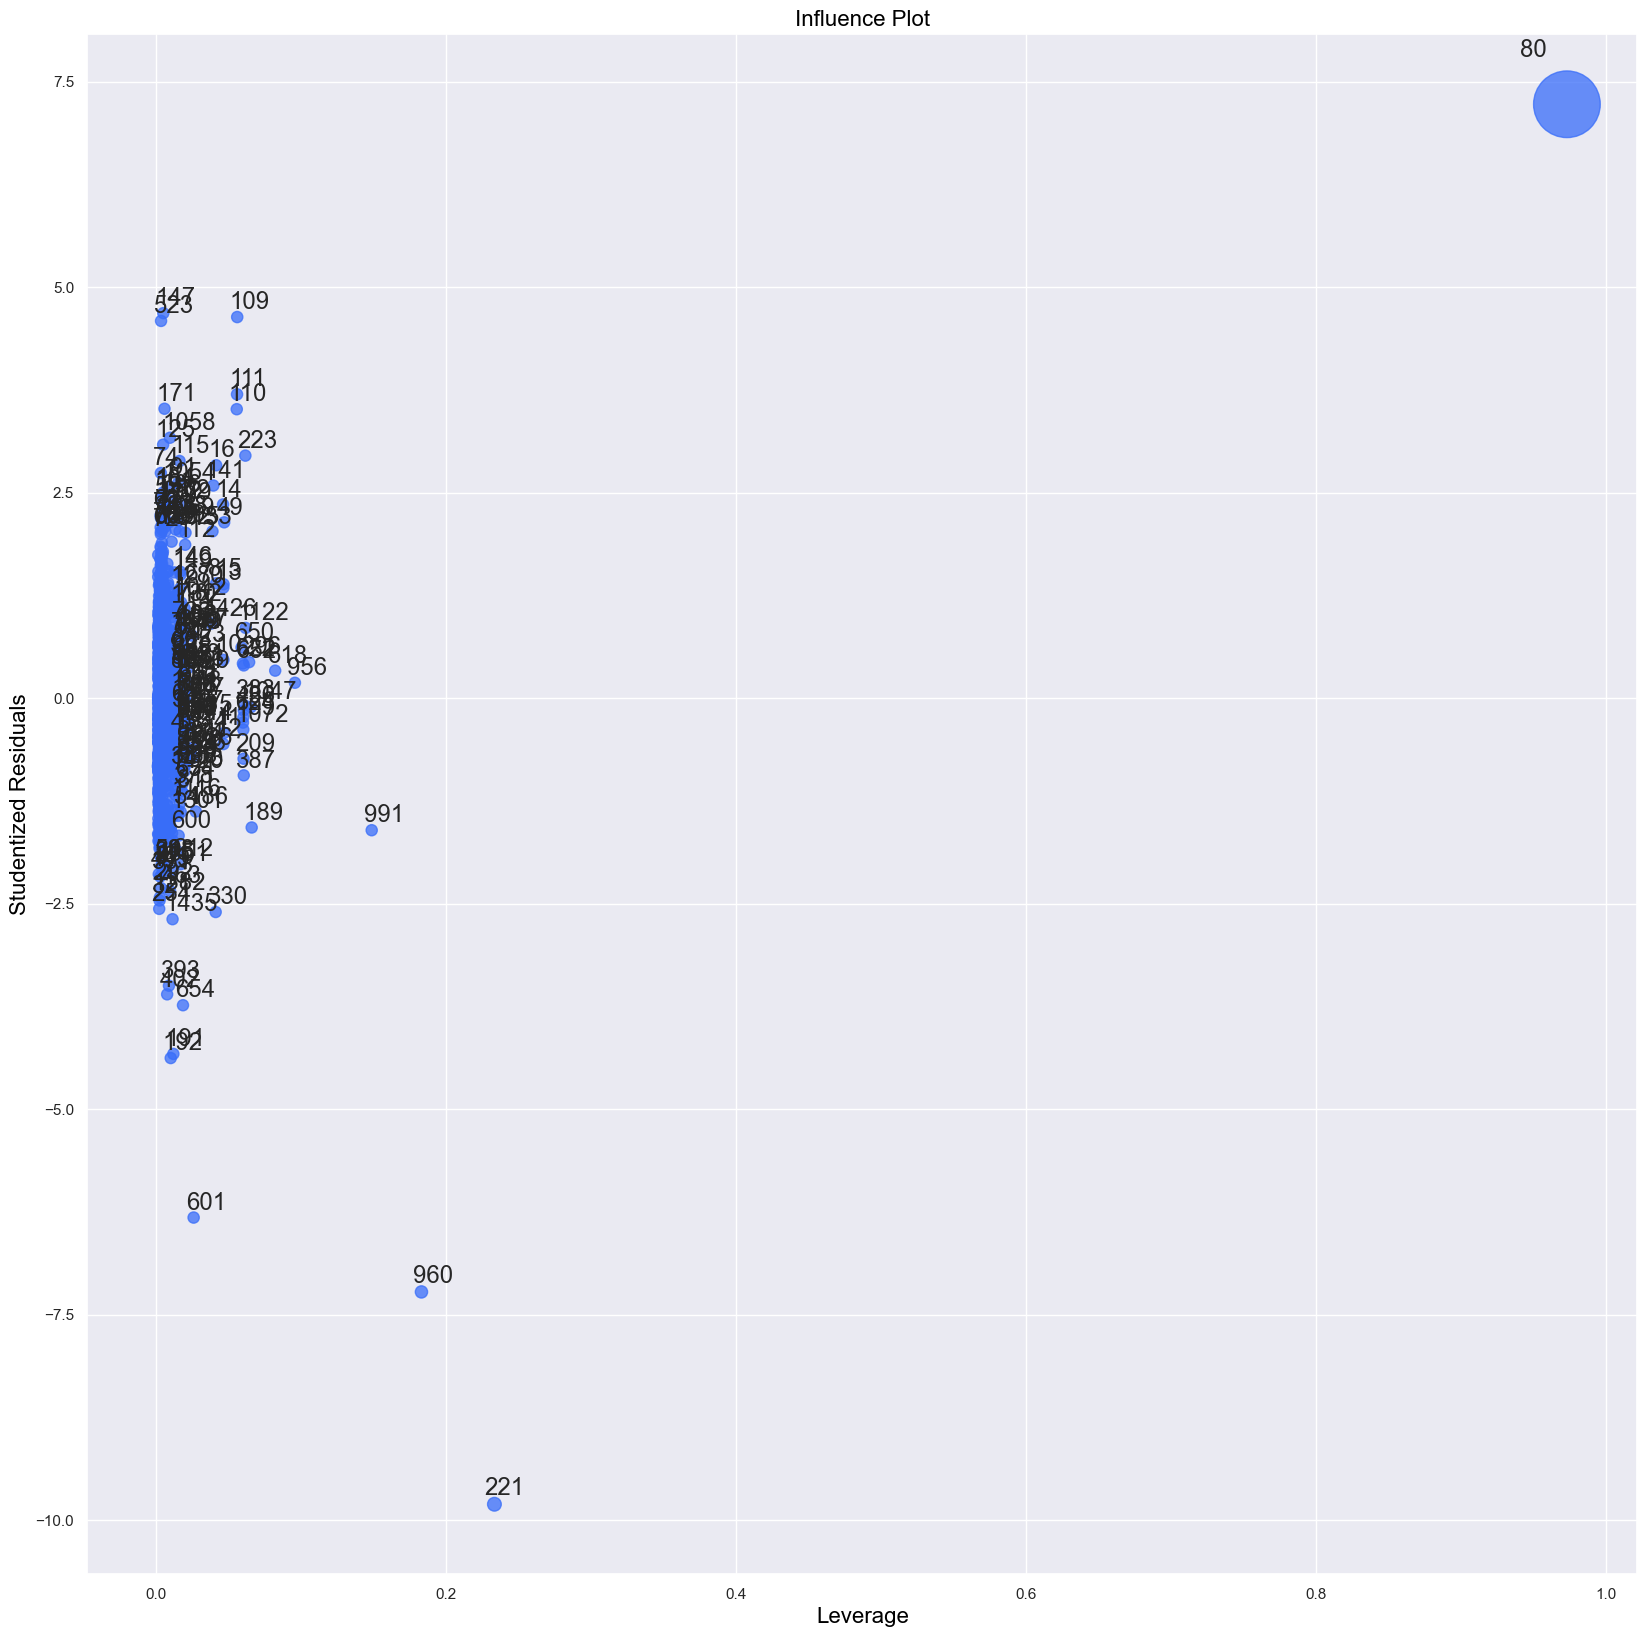

In [48]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [49]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=Toyato_corolla.shape[1]
n=Toyato_corolla.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.027177700348432057

In [50]:
Toyato_corolla[Toyato_corolla.index.isin([80])] 

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
80,18950,25,20019,110,1,16000,5,5,1180,0,0,1


# Improving the Model

In [51]:
# Creating a copy of data so that original dataset is not affected
toyato_new=Toyato_corolla.copy()
toyato_new

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [53]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
Toyato=toyato_new.drop(toyato_new.index[[80]],axis=0).reset_index(drop=True)
Toyato

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1430,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1431,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1432,7250,70,16916,86,0,1300,3,5,1015,0,0,1


# Model Detection Diagnostics and Final Model

In [54]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=Toyato).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    Toyato=Toyato.drop(Toyato.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    Toyato
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=Toyato).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8895629523799354


In [55]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=Toyato).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    Toyato=Toyato.drop(Toyato.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    Toyato 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=Toyato).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8876768823747951


In [56]:
final_model.rsquared

0.8876768823747951

In [57]:
Toyato

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1427,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1428,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1429,7250,70,16916,86,0,1300,3,5,1015,0,0,1


# Model Predictions

In [58]:
#  New data for prediction is
new_data=pd.DataFrame({'Age_08_04':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Fuel_Type_CNG":1,"Fuel_Type_Diesel":0,"Fuel_Type_Petrol":0,"Weight":1012},index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Weight
0,12,40000,80,1300,4,5,1,0,0,1012


In [59]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14320.039208
dtype: float64

In [81]:
# Automatic Prediction of Price
pred_y=final_model.predict(Toyato)
pred_y

0       16198.360543
1       15746.702250
2       16179.666315
3       15849.207301
4       15740.147564
            ...     
1426     9132.186959
1427     8492.340356
1428     8637.372204
1429     8749.614401
1430    11118.305918
Length: 1431, dtype: float64

In [82]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# 1. Lasso Regression

In [84]:

# Creating a Lasso regression model with alpha=0.1 (regularization strength)
lasso_model = Lasso(alpha=0.1)


In [85]:
# Fitting the model
lasso_model.fit(xtrain, ytrain)


Lasso(alpha=0.1)

In [86]:
# Making predictions
y_pred_lasso = lasso_model.predict(xtest)


In [87]:
# Calculating Mean Squared Error for Lasso
lasso_mse = mean_squared_error(ytest, y_pred_lasso)

print("Lasso Regression Mean Squared Error:", lasso_mse)

Lasso Regression Mean Squared Error: 13710736.834395282


# 2. Ridge Regression

In [88]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [89]:
# Creating a Ridge regression model with alpha=1.0 (regularization strength)
ridge_model = Ridge(alpha=1.0)

In [90]:
# Fitting the model
ridge_model.fit(xtrain, ytrain)


Ridge()

In [91]:
# Making predictions
y_pred_ridge = ridge_model.predict(xtest)


In [92]:
# Calculating Mean Squared Error for Ridge
ridge_mse = mean_squared_error(ytest, y_pred_ridge)

print("Ridge Regression Mean Squared Error:", ridge_mse)

Ridge Regression Mean Squared Error: 12308890.439786924


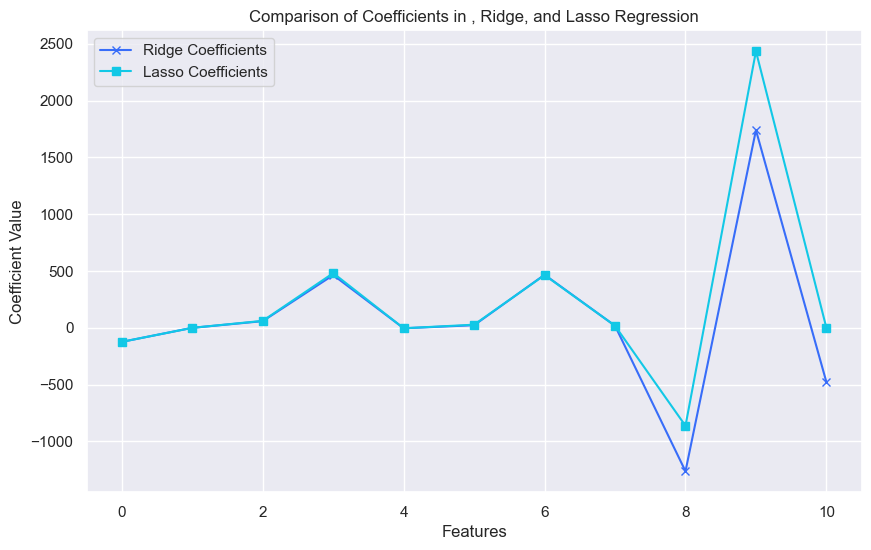

In [65]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(ridge_model.coef_, label='Ridge Coefficients', marker='x')
plt.plot(lasso_model.coef_, label='Lasso Coefficients', marker='s')
plt.title("Comparison of Coefficients in , Ridge, and Lasso Regression")
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

# Interview Question

#### 1.What is Normalization & Standardization and how is it helpful?
- Normalization 
is a data preprocessing technique used to convert the values of features to a specific range, often [0, 1] or [-1, 1]. The goal is to ensure that all features contribute equally to a model, regardless of their original scale.
- Standardization
A preprocessing technique that scales data to have a mean of 0 and a standard deviation of 1, converting the data into a z-score format.


#### 2.What techniques can be used to address multicollinearity in multiple linear regression?
 - The Technique We use to address multicollinearity in multiple linear regression are
 - Remove Highly Correlated Predictors
- Combine Predictors
- Regularization Techniques
-Centering the Variables
- Partial Least Squares Regression
- Stepwise Regression
- Increase Sample Size
- Domain Knowledge